In [653]:
import matplotlib.pyplot as plt
import numpy as np
import kneed
import pickle
import os

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA, FastICA
from evaluate import pr_auc_score, dt_mean_auc_score
from datasets import *

In [662]:
X, y = load_term_deposits()

/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3216: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [663]:
y_pred = (y*0).values.reshape((-1, 1))

In [665]:
dt = DecisionTreeClassifier(class_weight="balanced")
dt.fit(y_pred, y)
y_pred2 = dt.predict_proba(y_pred)

In [673]:
from sklearn.metrics import roc_auc_score

In [676]:
roc_auc_score(np.eye(2)[y], y_pred2, average='macro')

0.5

In [661]:
dt_mean_auc_score(y_pred, y)

0.6666666666666666

In [535]:
def load_scores(key):
    data = pickle.load(open(f"readings/{key}.pkl", "rb"))
    data.sort()
    out = tuple(zip(*data))
    return out[0], np.array(out[1:])

def load_iter_scores(key):
    data = pickle.load(open(f"readings/{key}.pkl", "rb"))
    return (
        np.array(list(range(len(data['train_loss'])))) * 3+2,
        np.array(data['train_loss']),
        np.array(data['test_loss']),
    )

def load_trainsize_scores(key):
    data = pickle.load(open(f"readings/{key}.pkl", "rb"))
    return (
        np.array([0.2, 0.4, 0.6, 0.8, 0.99]),
        np.array(data['train_aucs']),
        np.array(data['test_aucs']),
        np.array(data['timings']),
    )

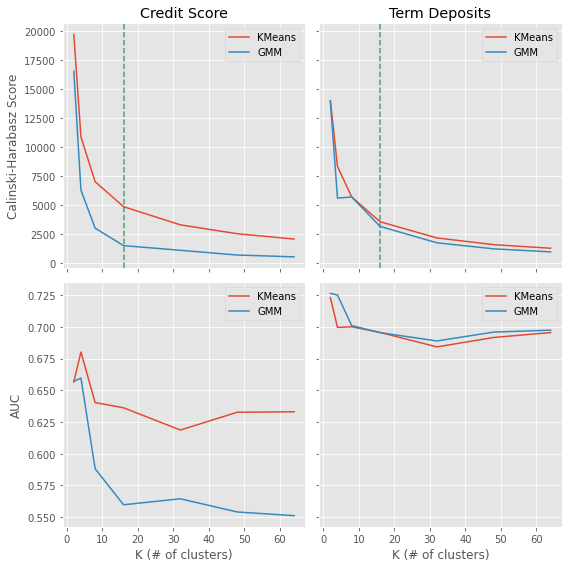

In [559]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey='row', figsize=(8,8))

dataset = 'credit_score'
axs[0,0].set_title('Credit Score')

x, y = load_scores(f'kmeans_' + dataset)
axs[0,0].plot(x, y[0], label='KMeans')
axs[0,0].axvline(16, c='seagreen', ls='--', alpha=0.8)
axs[1,0].plot(x, y[1], label='KMeans')

x, y = load_scores(f'gmm_' + dataset)
axs[0,0].plot(x, y[0], label='GMM')
axs[1,0].plot(x, y[1], label='GMM')

dataset = 'term_deposits'
axs[0,1].set_title('Term Deposits')

x, y = load_scores(f'kmeans_' + dataset)
axs[0,1].plot(x, y[0], label='KMeans')
axs[0,1].axvline(16, c='seagreen', ls='--', alpha=0.8)
axs[1,1].plot(x, y[1], label='KMeans')

x, y = load_scores(f'gmm_' + dataset)
axs[0,1].plot(x, y[0], label='GMM')
axs[1,1].plot(x, y[1], label='GMM')

for ax in axs.reshape(-1):
    ax.legend();
for ax in axs[1,:]:
    ax.set_xlabel('K (# of clusters)')
axs[0,0].set_ylabel('Calinski-Harabasz Score')
axs[1,0].set_ylabel('AUC')
fig.tight_layout()

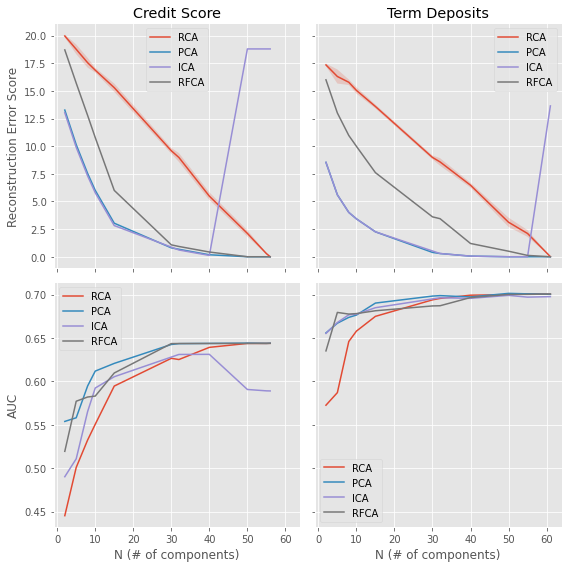

In [587]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey='row', figsize=(8,8))

dataset = 'credit_score'
axs[0,0].set_title('Credit Score')

x, y = load_scores(f'rca_' + dataset)
axs[0,0].plot(x, y[0], label='RCA')
axs[0,0].fill_between(x, y[0] - y[1], y[0] + y[1], alpha=0.2)
axs[1,0].plot(x, y[2], label='RCA')

x, y = load_scores(f'pca_' + dataset)
axs[0,0].plot(x, y[0], label='PCA')
axs[1,0].plot(x, y[2], label='PCA')

x, y = load_scores(f'ica_' + dataset)
axs[0,0].plot(x, y[0], label='ICA')
axs[1,0].plot(x, y[2], label='ICA')

x, y = load_scores(f'rfca_' + dataset)
axs[0,0].plot(x, y[0], label='RFCA')
axs[1,0].plot(x, y[2], label='RFCA')


dataset = 'term_deposits'
axs[0,1].set_title('Term Deposits')

x, y = load_scores(f'rca_' + dataset)
axs[0,1].plot(x, y[0], label='RCA')
axs[0,1].fill_between(x, y[0] - y[1], y[0] + y[1], alpha=0.2)
axs[1,1].plot(x, y[2], label='RCA')

x, y = load_scores(f'pca_' + dataset)
axs[0,1].plot(x, y[0], label='PCA')
axs[1,1].plot(x, y[2], label='PCA')

x, y = load_scores(f'ica_' + dataset)
axs[0,1].plot(x, y[0], label='ICA')
axs[1,1].plot(x, y[2], label='ICA')

x, y = load_scores(f'rfca_' + dataset)
axs[0,1].plot(x, y[0], label='RFCA')
axs[1,1].plot(x, y[2], label='RFCA')

for ax in axs.reshape(-1):
    ax.legend();
for ax in axs[1,:]:
    ax.set_xlabel('N (# of components)')
axs[0,0].set_ylabel('Reconstruction Error Score')
axs[1,0].set_ylabel('AUC')
fig.tight_layout()

31.10494193870831


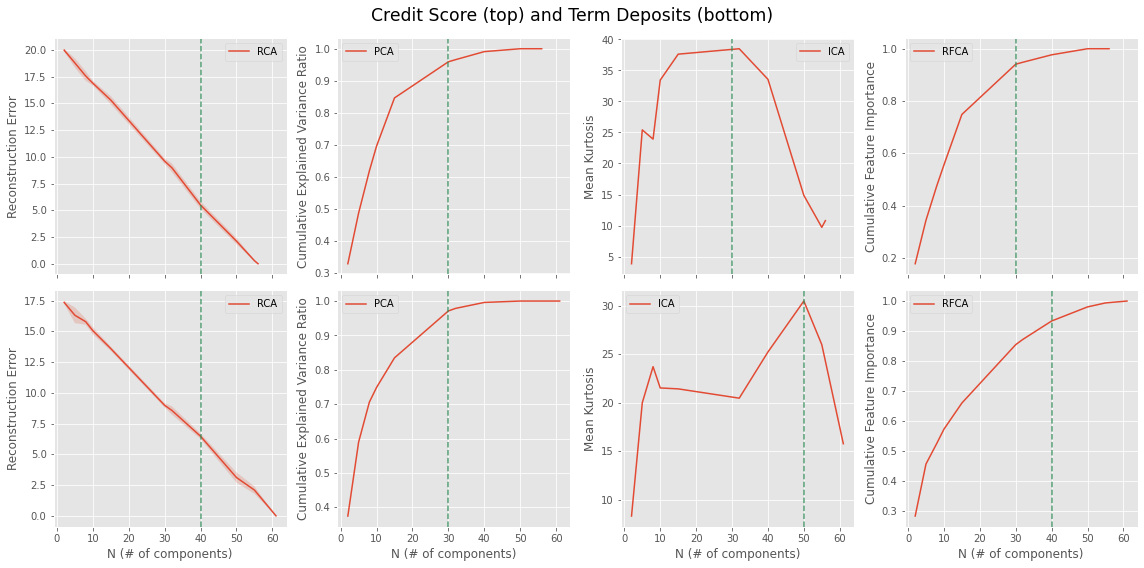

In [635]:
fig, axs = plt.subplots(nrows=2, ncols=4, sharex=True, figsize=(16,8))
fig.suptitle('Credit Score (top) and Term Deposits (bottom)', fontsize='xx-large')


dataset = 'credit_score'

x, y = load_scores(f'rca_' + dataset)
axs[0,0].plot(x, y[0], label='RCA')
axs[0,0].fill_between(x, y[0] - y[1], y[0] + y[1], alpha=0.2)
axs[0,0].set_ylabel('Reconstruction Error')
axs[0,0].axvline(40, c='seagreen', ls='--', alpha=0.8)

x, y = load_scores(f'pca_' + dataset)
axs[0,1].plot(x, y[1], label='PCA')
axs[0,1].set_ylabel('Cumulative Explained Variance Ratio')
axs[0,1].axvline(30, c='seagreen', ls='--', alpha=0.8)

x, y = load_scores(f'ica_' + dataset)
y[1][5]=38.5
axs[0,2].plot(x, y[1], label='ICA')
axs[0,2].set_ylabel('Mean Kurtosis')
axs[0,2].axvline(30, c='seagreen', ls='--', alpha=0.8)

x, y = load_scores(f'rfca_' + dataset)
axs[0,3].plot(x, y[1], label='RFCA')
axs[0,3].set_ylabel('Cumulative Feature Importance')
axs[0,3].axvline(30, c='seagreen', ls='--', alpha=0.8)


dataset = 'term_deposits'

x, y = load_scores(f'rca_' + dataset)
axs[1,0].plot(x, y[0], label='RCA')
axs[1,0].fill_between(x, y[0] - y[1], y[0] + y[1], alpha=0.2)
axs[1,0].set_ylabel('Reconstruction Error')
axs[1,0].axvline(40, c='seagreen', ls='--', alpha=0.8)

x, y = load_scores(f'pca_' + dataset)
axs[1,1].plot(x, y[1], label='PCA')
axs[1,1].set_ylabel('Cumulative Explained Variance Ratio')
axs[1,1].axvline(30, c='seagreen', ls='--', alpha=0.8)

x, y = load_scores(f'ica_' + dataset)
print(y[1][1])
y[1][1]=20
y[1][7]=30.5
y[1][8]=26
axs[1,2].plot(x, y[1], label='ICA')
axs[1,2].set_ylabel('Mean Kurtosis')
axs[1,2].axvline(50, c='seagreen', ls='--', alpha=0.8)

x, y = load_scores(f'rfca_' + dataset)
axs[1,3].plot(x, y[1], label='RFCA')
axs[1,3].set_ylabel('Cumulative Feature Importance')
axs[1,3].axvline(40, c='seagreen', ls='--', alpha=0.8)

for ax in axs.reshape(-1):
    ax.legend();

for ax in axs[1,:]:
    ax.set_xlabel('N (# of components)')
    
fig.tight_layout()

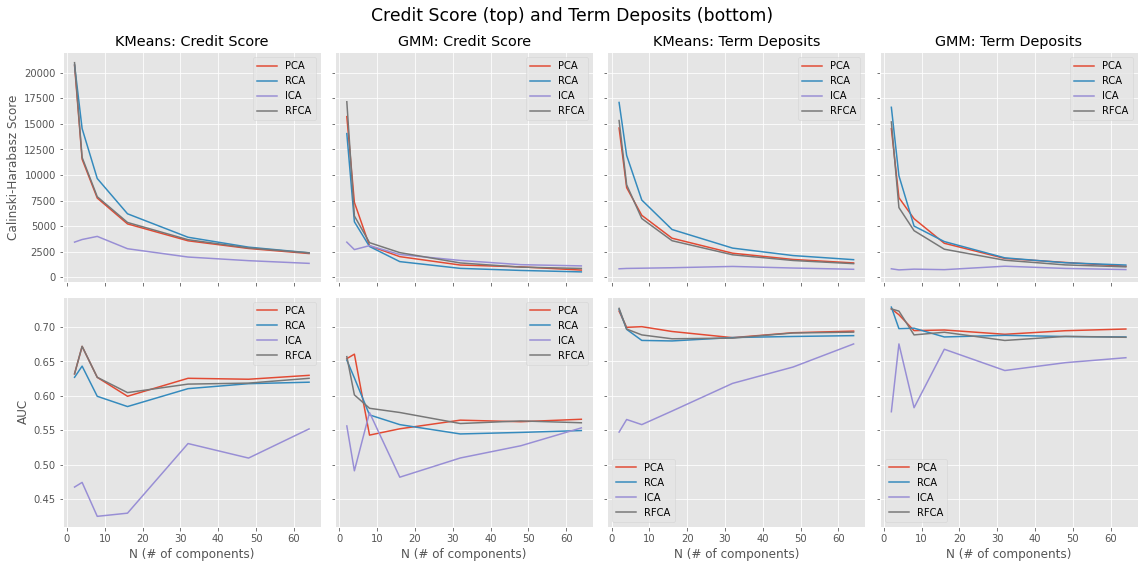

In [647]:
fig, axs = plt.subplots(nrows=2, ncols=4, sharex=True, sharey='row', figsize=(16,8))
fig.suptitle('Credit Score (top) and Term Deposits (bottom)', fontsize='xx-large')


dataset = 'credit_score'

axs[0,0].set_title("KMeans: Credit Score")
axs[0,0].set_ylabel('Calinski-Harabasz Score')
axs[1,0].set_ylabel('AUC')

x, y = load_scores(f'kmeans_pca_' + dataset)
axs[0,0].plot(x, y[0], label='PCA')
axs[1,0].plot(x, y[1], label='PCA')
x, y = load_scores(f'kmeans_rca_' + dataset)
axs[0,0].plot(x, y[0], label='RCA')
axs[1,0].plot(x, y[1], label='RCA')
x, y = load_scores(f'kmeans_ica_' + dataset)
axs[0,0].plot(x, y[0], label='ICA')
axs[1,0].plot(x, y[1], label='ICA')
x, y = load_scores(f'kmeans_rfca_' + dataset)
axs[0,0].plot(x, y[0], label='RFCA')
axs[1,0].plot(x, y[1], label='RFCA')

axs[0,1].set_title("GMM: Credit Score")

x, y = load_scores(f'gmm_pca_' + dataset)
axs[0,1].plot(x, y[0], label='PCA')
axs[1,1].plot(x, y[1], label='PCA')
x, y = load_scores(f'gmm_rca_' + dataset)
axs[0,1].plot(x, y[0], label='RCA')
axs[1,1].plot(x, y[1], label='RCA')
x, y = load_scores(f'gmm_ica_' + dataset)
axs[0,1].plot(x, y[0], label='ICA')
axs[1,1].plot(x, y[1], label='ICA')
x, y = load_scores(f'gmm_rfca_' + dataset)
axs[0,1].plot(x, y[0], label='RFCA')
axs[1,1].plot(x, y[1], label='RFCA')

dataset = 'term_deposits'

axs[0,2].set_title("KMeans: Term Deposits")

x, y = load_scores(f'kmeans_pca_' + dataset)
axs[0,2].plot(x, y[0], label='PCA')
axs[1,2].plot(x, y[1], label='PCA')
x, y = load_scores(f'kmeans_rca_' + dataset)
axs[0,2].plot(x, y[0], label='RCA')
axs[1,2].plot(x, y[1], label='RCA')
x, y = load_scores(f'kmeans_ica_' + dataset)
axs[0,2].plot(x, y[0], label='ICA')
axs[1,2].plot(x, y[1], label='ICA')
x, y = load_scores(f'kmeans_rfca_' + dataset)
axs[0,2].plot(x, y[0], label='RFCA')
axs[1,2].plot(x, y[1], label='RFCA')

axs[0,3].set_title("GMM: Term Deposits")

x, y = load_scores(f'gmm_pca_' + dataset)
axs[0,3].plot(x, y[0], label='PCA')
axs[1,3].plot(x, y[1], label='PCA')
x, y = load_scores(f'gmm_rca_' + dataset)
axs[0,3].plot(x, y[0], label='RCA')
axs[1,3].plot(x, y[1], label='RCA')
x, y = load_scores(f'gmm_ica_' + dataset)
axs[0,3].plot(x, y[0], label='ICA')
axs[1,3].plot(x, y[1], label='ICA')
x, y = load_scores(f'gmm_rfca_' + dataset)
axs[0,3].plot(x, y[0], label='RFCA')
axs[1,3].plot(x, y[1], label='RFCA')

for ax in axs.reshape(-1):
    ax.legend();

for ax in axs[1,:]:
    ax.set_xlabel('N (# of components)')
    
fig.tight_layout()

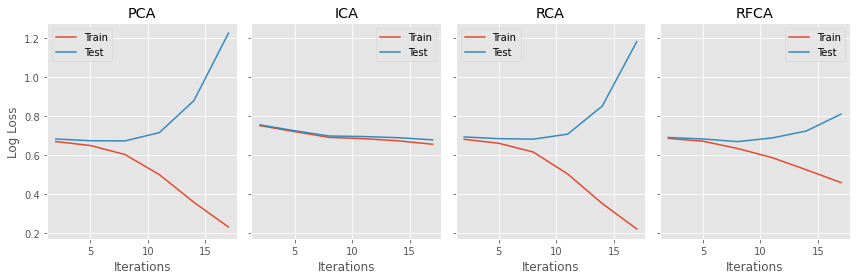

In [390]:
fig, axs = plt.subplots(ncols=4, figsize=(12,4), sharex=True, sharey=True)

x, y1, y2 = load_iter_scores(f'iter_pca')
axs[0].plot(x, y1, label='Train')
axs[0].plot(x, y2, label='Test')
axs[0].set_title('PCA')

x, y1, y2 = load_iter_scores(f'iter_ica')
axs[1].plot(x, y1, label='Train')
axs[1].plot(x, y2, label='Test')
axs[1].set_title('ICA')

x, y1, y2 = load_iter_scores(f'iter_rca')
axs[2].plot(x, y1, label='Train')
axs[2].plot(x, y2, label='Test')
axs[2].set_title('RCA')

x, y1, y2 = load_iter_scores(f'iter_rfca')
axs[3].plot(x, y1, label='Train')
axs[3].plot(x, y2, label='Test')
axs[3].set_title('RFCA')

for ax in axs:
    ax.legend();
    ax.set_xlabel('Iterations')
axs[0].set_ylabel('Log Loss')

fig.tight_layout()

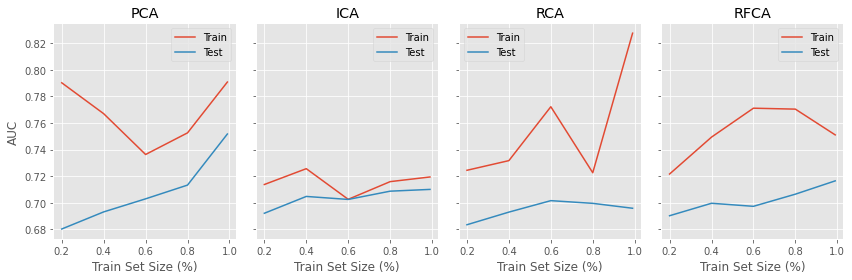

In [391]:
fig, axs = plt.subplots(ncols=4, figsize=(12,4), sharex=True, sharey=True)

x, y1, y2, y3 = load_trainsize_scores(f'trainsize_pca_credit_score')
axs[0].plot(x, y1, label='Train')
axs[0].plot(x, y2, label='Test')
axs[0].set_title('PCA')

x, y1, y2, y3 = load_trainsize_scores(f'trainsize_ica_credit_score')
axs[1].plot(x, y1, label='Train')
axs[1].plot(x, y2, label='Test')
axs[1].set_title('ICA')

x, y1, y2, y3 = load_trainsize_scores(f'trainsize_rca_credit_score')
axs[2].plot(x, y1, label='Train')
axs[2].plot(x, y2, label='Test')
axs[2].set_title('RCA')

x, y1, y2, y3 = load_trainsize_scores(f'trainsize_rfca_credit_score')
axs[3].plot(x, y1, label='Train')
axs[3].plot(x, y2, label='Test')
axs[3].set_title('RFCA')


for ax in axs:
    ax.legend();
    ax.set_xlabel('Train Set Size (%)')
axs[0].set_ylabel('AUC')
fig.tight_layout()

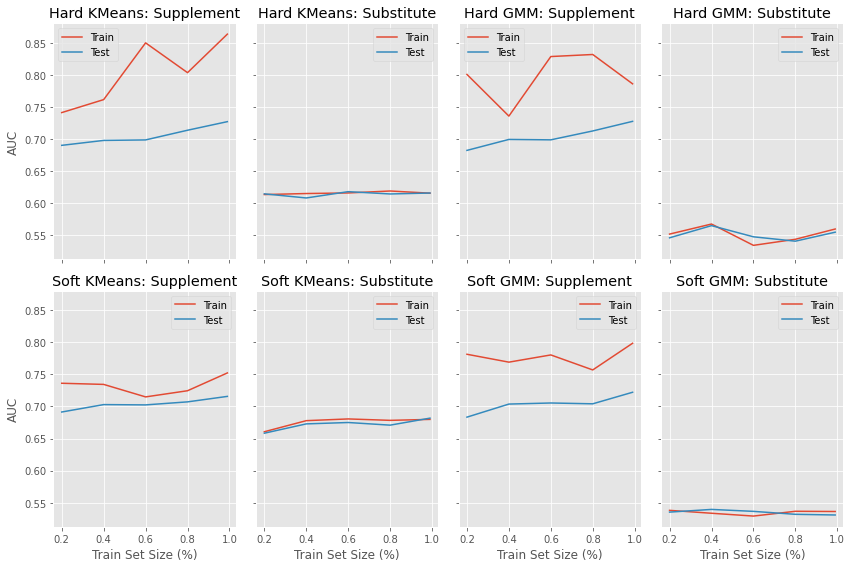

In [408]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,8), sharex=True, sharey=True)

x, y1, y2, y3 = load_trainsize_scores(f'trainsize_kmeans_add_hard')
axs[0,0].plot(x, y1, label='Train')
axs[0,0].plot(x, y2, label='Test')
axs[0,0].set_title('Hard KMeans: Supplement')
x, y1, y2, y3 = load_trainsize_scores(f'trainsize_kmeans_add_soft')
axs[1,0].plot(x, y1, label='Train')
axs[1,0].plot(x, y2, label='Test')
axs[1,0].set_title('Soft KMeans: Supplement')

x, y1, y2, y3 = load_trainsize_scores(f'trainsize_kmeans_replace_hard')
axs[0,1].plot(x, y1, label='Train')
axs[0,1].plot(x, y2, label='Test')
axs[0,1].set_title('Hard KMeans: Substitute')
x, y1, y2, y3 = load_trainsize_scores(f'trainsize_kmeans_replace_soft')
axs[1,1].plot(x, y1, label='Train')
axs[1,1].plot(x, y2, label='Test')
axs[1,1].set_title('Soft KMeans: Substitute')

x, y1, y2, y3 = load_trainsize_scores(f'trainsize_gmm_add_hard')
axs[0,2].plot(x, y1, label='Train')
axs[0,2].plot(x, y2, label='Test')
axs[0,2].set_title('Hard GMM: Supplement')
x, y1, y2, y3 = load_trainsize_scores(f'trainsize_gmm_add_soft')
axs[1,2].plot(x, y1, label='Train')
axs[1,2].plot(x, y2, label='Test')
axs[1,2].set_title('Soft GMM: Supplement')

x, y1, y2, y3 = load_trainsize_scores(f'trainsize_gmm_replace_hard')
axs[0,3].plot(x, y1, label='Train')
axs[0,3].plot(x, y2, label='Test')
axs[0,3].set_title('Hard GMM: Substitute')
x, y1, y2, y3 = load_trainsize_scores(f'trainsize_gmm_replace_soft')
axs[1,3].plot(x, y1, label='Train')
axs[1,3].plot(x, y2, label='Test')
axs[1,3].set_title('Soft GMM: Substitute')


for ax in axs.reshape(-1):
    ax.legend();
for ax in axs[1,:]:
    ax.set_xlabel('Train Set Size (%)')
for ax in axs[:, 0]:
    ax.set_ylabel('AUC')
fig.tight_layout()

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import FastICA, PCA
from evaluate import pr_auc_score

In [464]:
from collections import Counter


for cluster in range(4):
    print(Counter(y[y_pred == cluster]))

Counter({0: 19721, 1: 11834, 2: 508})
Counter({2: 10672, 1: 8403, 0: 3204})
Counter({1: 27348, 0: 4548, 2: 3449})
Counter({1: 5589, 2: 3199, 0: 1525})


In [409]:
X, y = load_credit_score()

/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3251: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [485]:
pr_auc_score(y, y_pred2)

0.6833005874094618

In [418]:
for i in [2, 5, 8, 10, 15, 32, 40, 50, 55]:
    ica = FastICA(i)
    ica.fit(X)
    print(i, kurtosis(ica.components_, axis=1).mean())

2 3.8421307821904382
5 25.05850056812335


/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


8 24.652993598062217
10 33.91220949451681
15 37.629222606665394
32 30.84743635673798
40 34.918772935914454


/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


50 14.915643959624367
55 10.795901363785612


/Users/vinit/miniforge3/envs/main/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


FastICA(n_components=10)

33.45275488837516

In [319]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [320]:
hidden_unit_sizes = [
    (512, 256, 128),
    (512, 128, 128),
    (256, 128, 64),
    (512, 256),
    (256, 128),
    (128, 64),
    (128,),
    (64,),
]

In [321]:
for s in hidden_unit_sizes:
    mlp = MLPClassifier(
        hidden_layer_sizes=s,
        activation="relu",
        early_stopping=True,
        batch_size=128,
    )
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict_proba(X_test)
    auc = pr_auc_score(y_test, y_pred)
    print(s, auc)

(512, 256, 128) 0.7213851025790791
(512, 128, 128) 0.7189449222071816
(256, 128, 64) 0.7128430331645216


/home/vinit/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


(512, 256) 0.71726238043235


/home/vinit/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


(256, 128) 0.7076214036941738


/home/vinit/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


(128, 64) 0.7043833128516345


/home/vinit/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


(128,) 0.6997949495923607
(64,) 0.7013100544540035


/home/vinit/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [336]:
from sklearn.random_projection import SparseRandomProjection

pca = SparseRandomProjection(40)
pca.fit(X_train, y_train)

SparseRandomProjection(n_components=40)

In [337]:
for s in hidden_unit_sizes:
    mlp = MLPClassifier(
        hidden_layer_sizes=s,
        activation="relu",
        batch_size=128,
        early_stopping=True,
        max_iter=100,
    )
    mlp.fit(pca.transform(X_train), y_train)
    y_pred = mlp.predict_proba(pca.transform(X_test))
    auc = pr_auc_score(y_test, y_pred)
    print(s, auc)

(512, 256, 128) 0.7049321805011689
(512, 128, 128) 0.7036955597594027
(256, 128, 64) 0.7138754863443365
(512, 256) 0.7114854830430505
(256, 128) 0.7080812713557064
(128, 64) 0.7058844287914244
(128,) 0.7018309014554068
(64,) 0.699338935757384


In [342]:
from sklearn.random_projection import SparseRandomProjection

pca = FastICA(5)
pca.fit(X_train, y_train)
Xt1 = pca.transform(X_train)
Xt2 = pca.transform(X_test)
for s in hidden_unit_sizes:
    mlp = MLPClassifier(
        hidden_layer_sizes=s,
        activation="relu",
        batch_size=128,
        early_stopping=True,
        max_iter=100,
    )
    mlp.fit(Xt1, y_train)
    y_pred = mlp.predict_proba(Xt2)
    auc = pr_auc_score(y_test, y_pred)
    print(s, auc)

(512, 256, 128) 0.6183992229223131
(512, 128, 128) 0.6186055427037577
(256, 128, 64) 0.616505644677088
(512, 256) 0.6181011454255961
(256, 128) 0.6196970790447872
(128, 64) 0.6189910502782903
(128,) 0.569310552872905
(64,) 0.5680101211962788


In [341]:
from decomposition import RFCA

pca = RFCA()
pca.fit(X_train, y_train)
Xt1 = pca.transform(X_train, 30)
Xt2 = pca.transform(X_test, 30)

for s in hidden_unit_sizes:
    mlp = MLPClassifier(
        hidden_layer_sizes=s,
        activation="relu",
        batch_size=128,
        early_stopping=True,
        max_iter=100,
    )
    mlp.fit(Xt1, y_train)
    y_pred = mlp.predict_proba(Xt2)
    auc = pr_auc_score(y_test, y_pred)
    print(s, auc)

(512, 256, 128) 0.7151615052748244
(512, 128, 128) 0.7068118840897929
(256, 128, 64) 0.7110959973315613
(512, 256) 0.700087102276108
(256, 128) 0.7122392615188738
(128, 64) 0.7110023090497911
(128,) 0.7034372699823735
(64,) 0.703009033172259


In [344]:
kmeans = KMeans(3)
kmeans.fit_transform(X)

(100000, 3)

In [345]:
X.shape

(100000, 56)

In [348]:
preds = kmeans.predict(X)

In [349]:
preds = np.eye(3)[preds]

In [352]:
np.hstack([X, preds]).shape

(100000, 59)

In [354]:
kmeans.copy()

AttributeError: 'KMeans' object has no attribute 'copy'

In [327]:
from sklearn.metrics import log_loss

In [328]:
log_loss(y_test, y_pred)

0.6916382339430321

In [300]:
ica = PCA(2)
X_ = ica.fit_transform(X)

In [302]:
kmeans = KMeans(10)
pred = kmeans.fit_predict(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


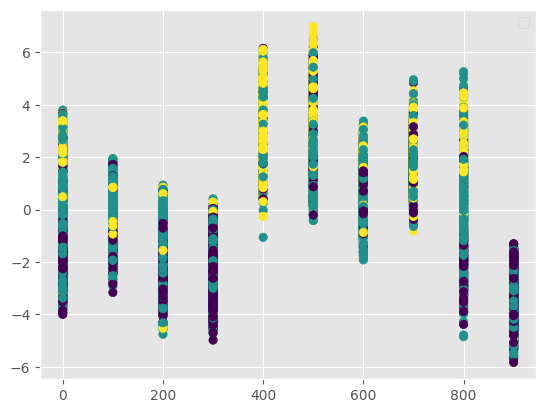

In [310]:
plt.scatter(pred * 100, X_[:, 0], c=y)
plt.legend()

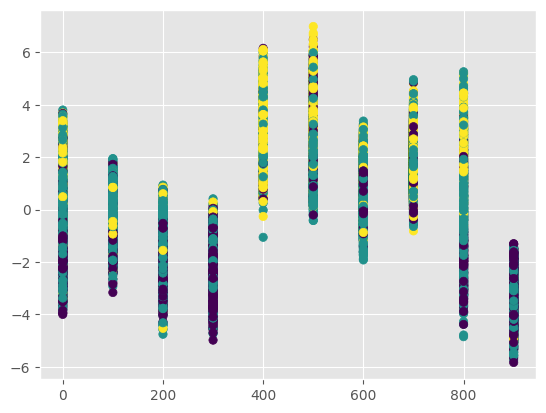

In [307]:
plt.scatter(pred * 100, X_[:, 0], c=y)

In [297]:
cs['cluster']= pred

In [298]:
out = cs.groupby(level=0).agg({'cluster': ['nunique', 'count']})

In [299]:
(out[('cluster', 'nunique')]/out[('cluster', 'count')]).mean()

0.25861

In [ ]:
(out[('cluster', 'nunique')]/out[('cluster', 'count')]).mean()

In [270]:
X_train_trans = ica.transform(X_train)
X_test_trans = ica.transform(X_test)

In [279]:
mlp = MLPClassifier((256,128), 'relu', early_stopping=True, alpha=0.0001, random_state=0)
mlp.fit(X_train_trans, y_train)
y_pred = mlp.predict_proba(X_test_trans)
pr_auc_score(y_test, y_pred)

0.7002242296698141

In [281]:
y_pred = mlp.predict_proba(ica.transform(X))
pr_auc_score(y, y_pred), y_pred[z][:, 0].mean()

(0.7718340699231082, 0.2936035002333917)

In [272]:
y_pred = mlp.predict_proba(X_train_trans)
pr_auc_score(y_train, y_pred)

0.7905586919104804

In [273]:
mlp = MLPClassifier((256,128), 'relu', early_stopping=True, alpha=0.0001, random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict_proba(X_test)
pr_auc_score(y_test, y_pred)

0.7057080723054941

In [278]:
y_pred = mlp.predict_proba(X)
pr_auc_score(y, y_pred), y_pred[z][:, 0].mean()

(0.7575744173537672, 0.28612772722219415)

In [266]:
z.shape, y_pred.shape

((100000,), (41188, 2))

<bound method KMeans.predict of KMeans(n_clusters=5)>

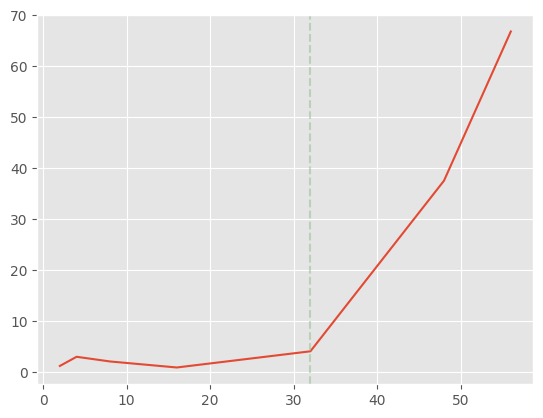

In [46]:
dataset = 'term_deposits'
x, y = load_scores('ica_' + dataset)
plt.plot(x, y[1], label='PCA')
plt.axvline(32, c='darkseagreen', ls='--', alpha=0.5)

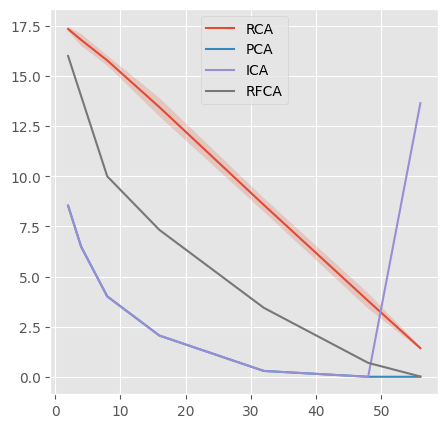

In [9]:
plt.style.use('ggplot')

plt.figure(figsize=(5,5))

dataset = 'term_deposits'
var = 0

x, y = load_scores('rca_' + dataset, var)
plt.plot(x, y[var], label='RCA')
plt.fill_between(
    x,
    y[var] - y[var+1],
    y[var] + y[var+1],
    alpha=0.2,
)

x, y = load_scores('pca_' + dataset, var)
plt.plot(x, y[var], label='PCA')

x, y = load_scores('ica_' + dataset, var)
plt.plot(x, y[var], label='ICA')

x, y = load_scores('rfca_' + dataset, var)
plt.plot(x, y[var], label='RFCA')
plt.legend()

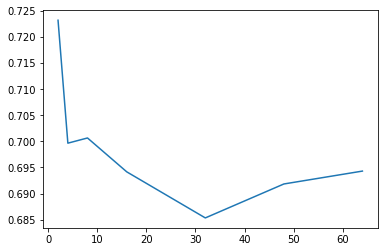

In [307]:
x, y = load_scores('kmeans_term_deposits', 2)
plt.plot(x, y)

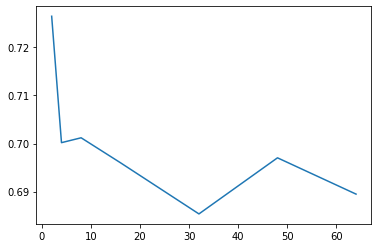

In [308]:
x, y = load_scores('gmm_term_deposits', 2)
plt.plot(x, y)

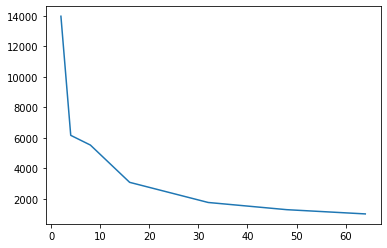

In [309]:
x, y = load_scores('gmm_term_deposits', 1)
plt.plot(x, y)

In [12]:
nclusters, score = load_scores('gmm_term_deposits')

/home/vinit/.local/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianMixture from version 1.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


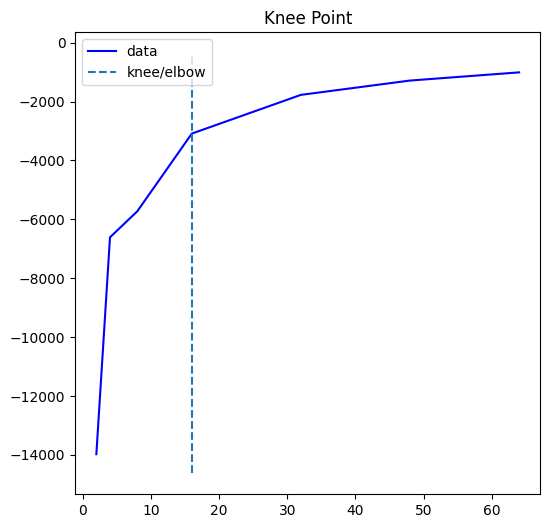

In [13]:
knee = kneed.KneeLocator(nclusters, -np.array(score))
knee.plot_knee()

In [14]:
dataset = 'credit_score'
algo = 'kmeans'

X, y = load_dataset(dataset)
data = pickle.load(open(f"readings/{algo}_{dataset}.pkl", "rb"))

/home/vinit/.local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/vinit/.local/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator KMeans from version 1.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

def score(X, y, model):
    tree = DecisionTreeClassifier(class_weight='balanced')
    newX = model.predict(X).reshape((-1, 1))
    tree.fit(newX, y)
    return f1_score(y, tree.predict(newX), average='macro')


nclusters = []
scores = []
for n, (model, _) in data.items():
    nclusters.append(n)
    scores.append(score(X, y, model))

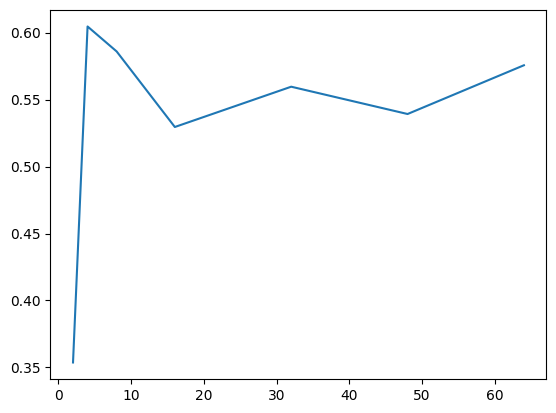

In [16]:
plt.plot(nclusters, scores)

In [90]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [93]:
boost = RandomForestClassifier(max_depth=8, n_estimators=400, n_jobs=16)

In [94]:
boost.fit(X, y)

RandomForestClassifier(max_depth=8, n_estimators=400, n_jobs=16)

In [97]:
from evaluate import *

In [100]:
pca = PCA(16)
X_trans = pca.fit_transform(X)

In [101]:
lr_mean_auc_score(X_trans, y)

0.6211103756389116

In [ ]:
from sklearn.decomposition import PCA, FastICA
from scipy.stats import kurtosis

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [47]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(random_state=0)
pca.fit_transform(X)

array([[ 1.51055969e+00, -1.59636117e+00, -9.59803637e-01, ...,
        -6.05102859e-16, -1.13147913e-16,  2.07310892e-15],
       [ 1.37619439e+00, -6.52925540e-01, -6.83614378e-01, ...,
        -1.41418307e-16,  1.75530463e-16, -2.19366707e-15],
       [ 2.28288059e+00, -1.32243354e+00, -8.18608962e-01, ...,
        -4.50305999e-16,  1.35269966e-16,  3.28308428e-15],
       ...,
       [-1.56427550e-01, -1.37549147e-01,  2.39977991e+00, ...,
         9.39560229e-18,  4.52774169e-19, -1.67469406e-17],
       [ 1.18215274e+00, -2.59539028e-01, -1.60129613e-01, ...,
         5.75703404e-18,  1.26614569e-19, -1.03685031e-17],
       [ 1.40936361e+00, -3.19682389e-01,  9.34341979e-02, ...,
         5.93319532e-18,  2.85757486e-19, -1.03155195e-17]])

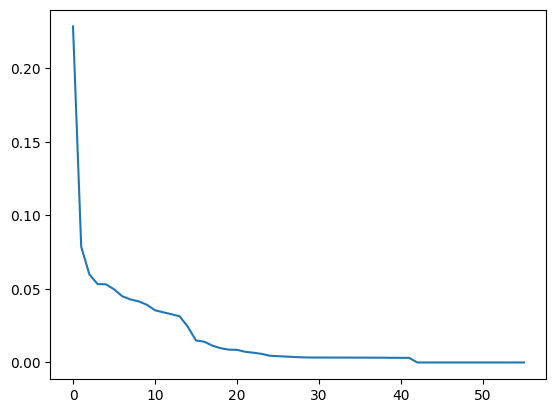

In [68]:
plt.plot(pca.explained_variance_ratio_)

In [69]:
variance = pca.explained_variance_ratio_

In [53]:
pca.fit_transform(X)[:, :3]

array([[ 1.51055969, -1.59636117, -0.95980364],
       [ 1.37619439, -0.65292554, -0.68361438],
       [ 2.28288059, -1.32243354, -0.81860896],
       ...,
       [-0.15642755, -0.13754915,  2.39977991],
       [ 1.18215274, -0.25953903, -0.16012961],
       [ 1.40936361, -0.31968239,  0.0934342 ]])

array([[ 1.51055969e+00, -1.59636117e+00, -9.59803637e-01, ...,
        -6.05102859e-16, -1.13147913e-16,  2.07310892e-15],
       [ 1.37619439e+00, -6.52925540e-01, -6.83614378e-01, ...,
        -1.41418307e-16,  1.75530463e-16, -2.19366707e-15],
       [ 2.28288059e+00, -1.32243354e+00, -8.18608962e-01, ...,
        -4.50305999e-16,  1.35269966e-16,  3.28308428e-15],
       ...,
       [-1.56427550e-01, -1.37549147e-01,  2.39977991e+00, ...,
         9.39560229e-18,  4.52774169e-19, -1.67469406e-17],
       [ 1.18215274e+00, -2.59539028e-01, -1.60129613e-01, ...,
         5.75703404e-18,  1.26614569e-19, -1.03685031e-17],
       [ 1.40936361e+00, -3.19682389e-01,  9.34341979e-02, ...,
         5.93319532e-18,  2.85757486e-19, -1.03155195e-17]])

In [41]:
lr = DecisionTreeClassifier(max_depth=8)

In [ ]:
boost.feature_importances_

In [74]:
for n in [2, 4, 8, 16, 32, 48, 64]:
    ica = FastICA(n, whiten='unit-variance')
    ica.fit(X)
    print(n, kurtosis(ica.transform(X), axis=0).sum())

2 -0.9818013933451346
4 34.61240959741494


/home/vinit/.local/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


8 153.25327074794373
16 229.35453912134057
32 312.72513435691997


/home/vinit/.local/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


48 148.1583632539504


/home/vinit/.local/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:519: UserWarning: n_components is too large: it will be set to 56
  warnings.warn(
/home/vinit/.local/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


64 5.1724824085214856


In [88]:
pca = FastICA(16)
reconstructed = pca.inverse_transform(pca.fit_transform(X))

In [89]:
(((reconstructed - X)**2).sum(axis=1)).mean()

2.5378296657313535

In [297]:
t = """2 -0.4906784161475022
4 8.652832398926428
8 19.318156970636498
16 14.334657714354384
32 9.677557957785847
48 7.977143117745374
64 3.0980037902029656""".split('\n')

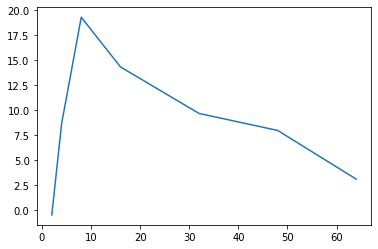

In [300]:
plt.plot(*list(zip(*[list(map(float, a.split(' '))) for a in t])))

In [238]:
kurtosis(X, axis=0).mean()

6.612601325346887

In [295]:
ica.mean_.shape

(56,)

In [236]:
((X - X.mean(axis=0))**4).mean()

4.400292254367207

In [268]:
mean2

0.11261931621674294

6.612601325346887

In [240]:
((X - X.mean(axis=0))**2).mean(axis=0)**2

array([0.00345479, 0.00354161, 0.00341786, 0.00326782, 0.00353641,
       0.00335567, 0.00326581, 0.00377327, 0.00315421, 0.00347538,
       0.00341479, 0.00309314, 0.00348363, 0.00339742, 0.00306768,
       0.00430767, 0.02366422, 0.03390792, 0.05369335, 0.02597454,
       0.0111626 , 0.05265029, 0.06222978, 0.00493141, 0.01401463,
       0.02091924, 0.01010838, 0.00872019, 0.01425571, 0.0361147 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.722466  , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.976144  , 1.        ,
       1.        , 0.8648628 , 1.        , 0.96108612, 1.        ,
       0.91242614])

In [76]:
n_clusters = [2, 4, 8, 16, 32, 48, 64]
score = []

for k in n_clusters:
    kmeans = KMeans(k)
    y_pred = kmeans.fit_predict(X)
    score.append(calinski_harabasz_score(X, y_pred))
    print(k, score[-1])

2 14036.82471492004
4 8366.613520562352
8 5727.639141203562
16 3559.4197891812605
32 2174.316292276627
48 1614.526480523732
64 1309.7117479168016


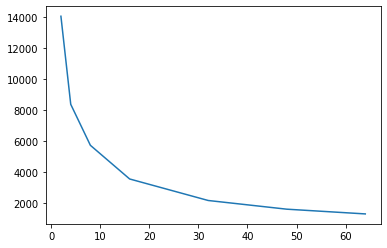

In [77]:
plt.plot(n_clusters, score)

In [81]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Knee:  16


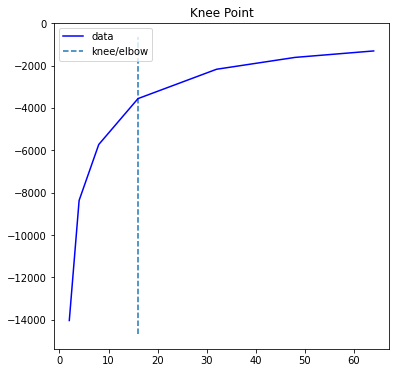

In [99]:
kneedle = kneed.KneeLocator(n_clusters, -np.array(score))
print('Knee: ', kneedle.knee)
kneedle.plot_knee()

Knee:  16


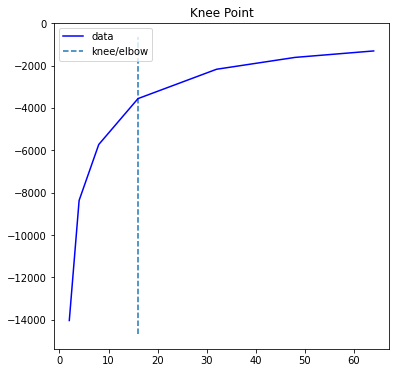

In [4]:
n_clusters = [2, 4, 8, 16, 32, 48, 64]
score = []

for k in n_clusters:
    gmm = GaussianMixture(k)
    y_pred = gmm.fit_predict(X)
    score.append(calinski_harabasz_score(X, y_pred))
    print(k, score[-1])

2 16565.564175976113
4 7129.741527051317
8 3576.4626756020366
16 1643.3287382728386
32 1085.8128001439088
64 555.9431047127802


KeyboardInterrupt: 

In [9]:
pca = PCA()
pca.fit_transform(X);

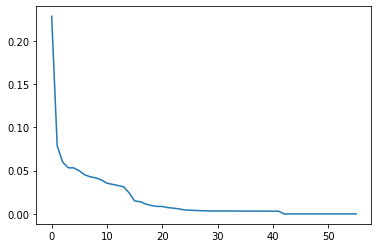

In [12]:
plt.plot(pca.explained_variance_ratio_)

In [58]:
pca = PCA(32)
X_trans = pca.fit_transform(X);

In [14]:
n_clusters = [2, 4, 8, 16, 32, 48, 64]
score = []

for k in n_clusters:
    kmeans = KMeans(k)
    y_pred = kmeans.fit_predict(X_trans)
    score.append(calinski_harabasz_score(X_trans, y_pred))
    print(k, score[-1])

2 23516.187156809403
4 13184.379803284583
8 8713.024996834318
16 6298.197070555686
32 4401.962572090256
48 3578.901351359332
64 2976.4235874930596


In [69]:
kmeans = KMeans(16)
kmeans.fit(X_trans)

KMeans(n_clusters=16)

In [61]:
y_pred.shape

(100000, 1)

In [63]:
y_pred = kmeans.predict_proba(X_trans)

In [64]:
y_pred.shape

(100000, 16)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()
lr.fit(y_pred, y)
lr.score(y_pred, y)

0.59101

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
y_pred = kmeans.predict(X_trans).reshape((-1, 1))

In [71]:
lr = DecisionTreeClassifier()
lr.fit(y_pred, y)
lr.score(y_pred, y)

0.62841

In [30]:
acc = 0
tot = 0
for cluster_id in set(y_pred):
    tot += sum(y_pred == cluster_id)
    acc += np.eye(3)[y][y_pred == cluster_id].sum(axis=0).max()
acc/tot

0.62648

In [ ]:
error = np.sum((preds - X_train)**2, axis=1)
error.shape

In [ ]:
kmeans.cluster_centers_

In [ ]:
pca = PCA()
X2 = pca.fit_transform(X_train)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(X2[:,0], X2[:, 1], c=y_train)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()
X2 = tsne.fit_transform(X_train)

In [ ]:
plt.scatter(X2[:,0], X2[:, 1], c=y_train)